In [0]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [0]:
#read the data file
dataset = pd.read_csv('final.csv', usecols=[0, 1])

In [0]:
#train dataset is all the values before 1440 values, test is 1440 values i.e. 1 month
train = dataset[:16080]
test = dataset[16080:]

In [43]:
#apply to time index 1 to 16081 for train and 16081 to 17521
train['time_index'] = range(1, len(train)+1)
test['time_index'] = range(len(train)+1, (len(train) + len(test) + 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#prediction for a month
no_of_predictions = 1440

In [0]:
X = np.array(train.time_index, dtype = float)
y = np.array(train.value, dtype = float)
Z = np.array(test.time_index, dtype = float)

# 10 degrees of freedom used
coefs = poly.polyfit(X, y, 10)
X_new = np.linspace(X[0], X[-1], num=len(X)+no_of_predictions) #fit for every 1440 values
ffit = poly.polyval(X_new, coefs)
pred = poly.polyval(Z,coefs)

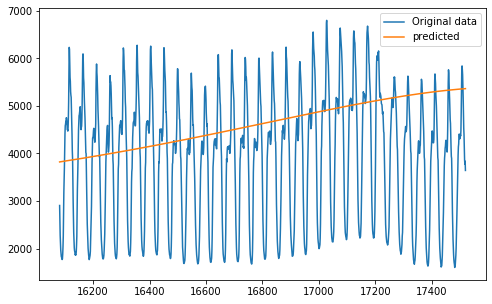

In [49]:
#plot fit for test data
plt.rcParams["figure.figsize"] = (8,5)
plt.plot(test['time_index'], test['value'], label="Original data")
plt.plot(test['time_index'], pred, label="predicted")
plt.legend()
plt.show()

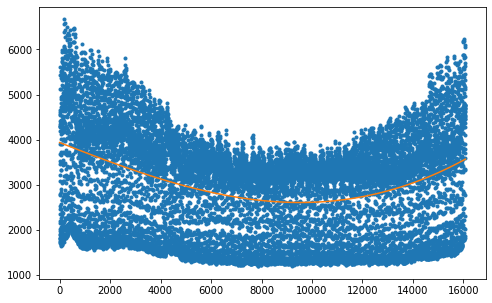

In [50]:
#fit for train data 
z = np.polyfit(X, y, 4)

p = np.poly1d(z)

xp = np.linspace(X.min(), X.max(), 100)
#plot fit for train data
plt.plot(X, y, '.', xp, p(xp), '-')

plt.show()

In [0]:
#define MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [0]:
poly_mape = mean_absolute_percentage_error(test['value'], pred)

In [53]:
#Print MAPE score
print(poly_mape)

48.61525833907166
